# load package

In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt
#import plotly.express as px
%matplotlib notebook
#%matplotlib inline
#%matplotlib ipympl
#%matplotlib widget
import scipy.misc
from PIL import Image
import denseCRF

# get image

<IPython.core.display.Javascript object>


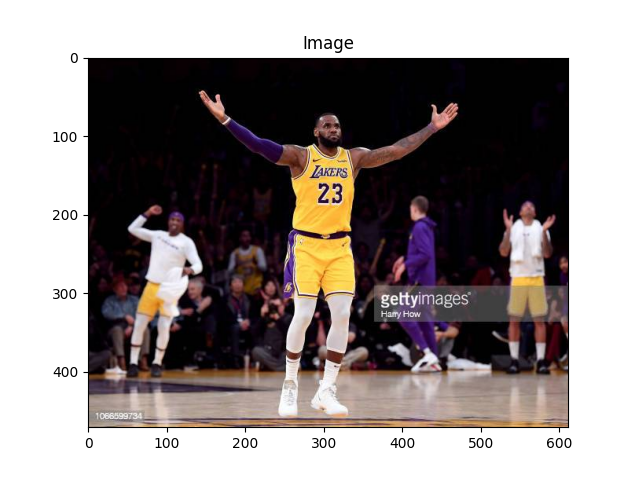

In [30]:
im = cv2.imread("./image/input/input.jpg")
color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

# object detection

<IPython.core.display.Javascript object>


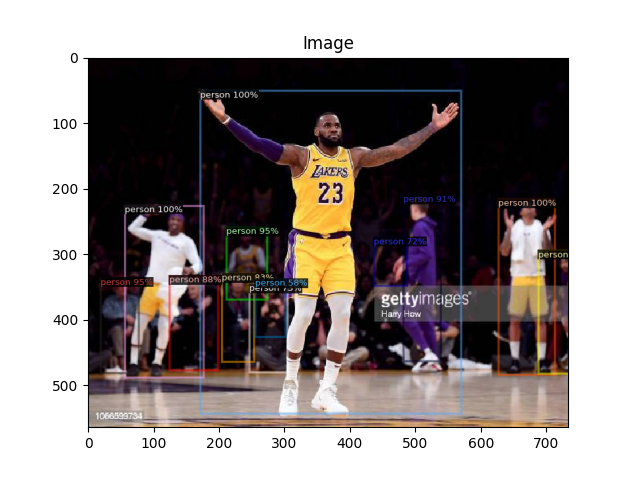

In [7]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

# segmentation

## first model

### create config

In [8]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

### create predictor

In [9]:
predictor = DefaultPredictor(cfg)

### Make prediction

In [10]:
outputs = predictor(im)

### visualization

In [11]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

<IPython.core.display.Javascript object>


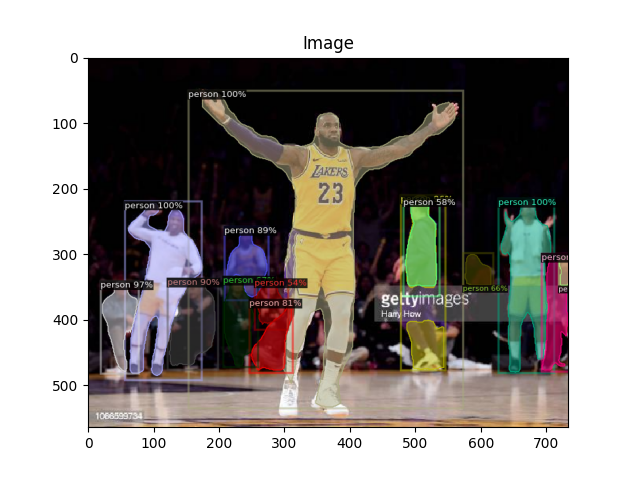

In [12]:
#cv2.imshow("",v.get_image()[:, :, ::-1])
color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
#fig = px.imshow(color)
#fig.show()
plt.imshow(color)
plt.title('Image')
plt.show()

## other model

<IPython.core.display.Javascript object>


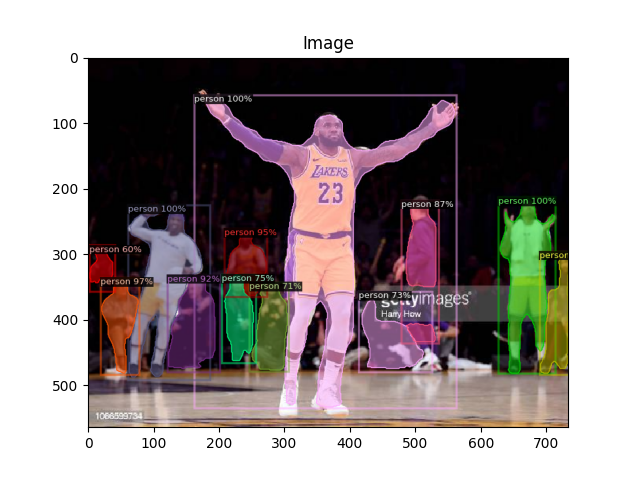

In [13]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

<IPython.core.display.Javascript object>


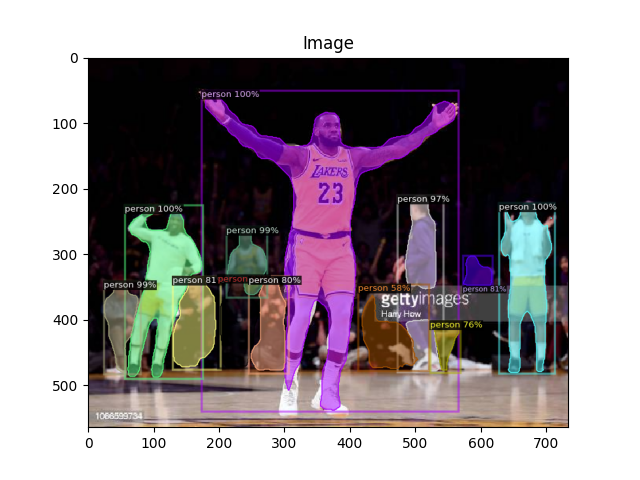

In [14]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

best model => mask_rcnn_X_101_32x8d_FPN_3x

# Person Keypoint Detection

<IPython.core.display.Javascript object>


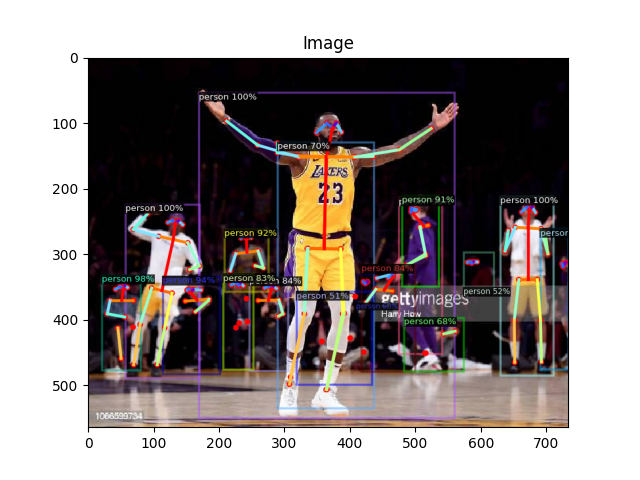

In [15]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

<IPython.core.display.Javascript object>


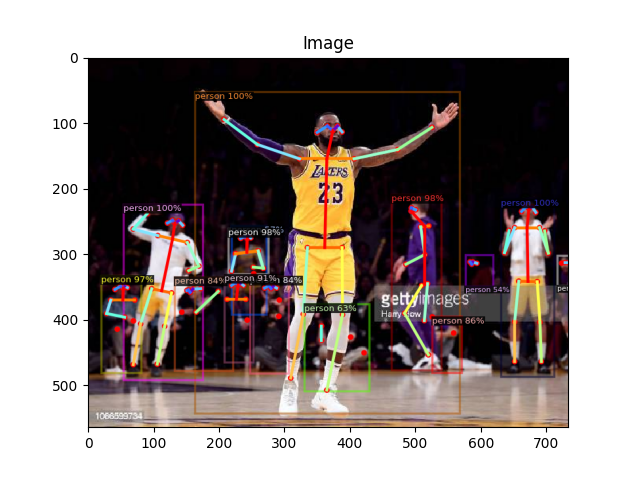

In [16]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

# panoptic

<IPython.core.display.Javascript object>


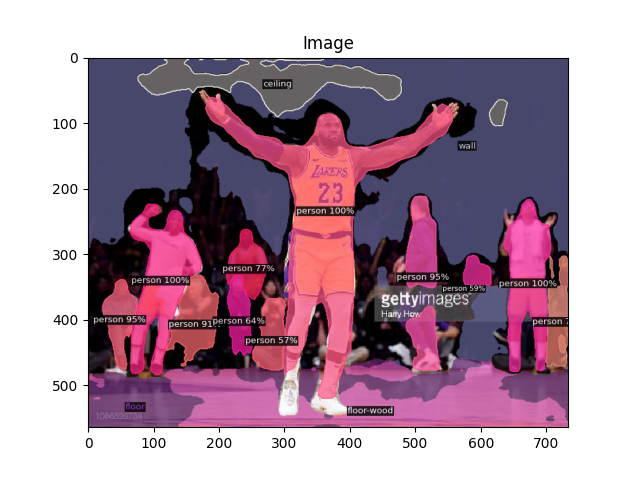

In [17]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_50_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_1x.yaml")

predictor = DefaultPredictor(cfg)

panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

color = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

<IPython.core.display.Javascript object>


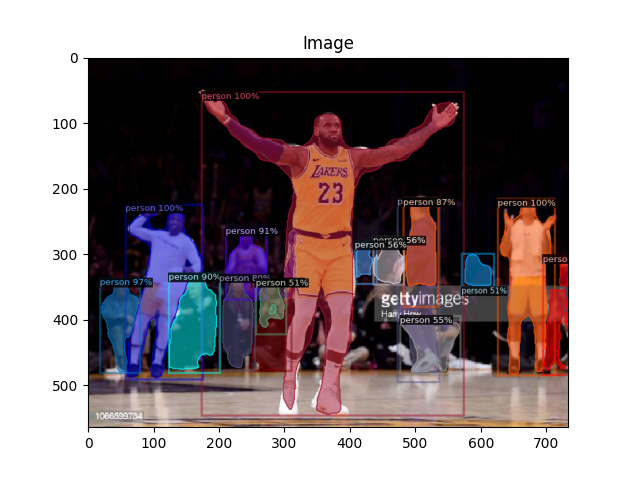

In [18]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

# misc

<IPython.core.display.Javascript object>


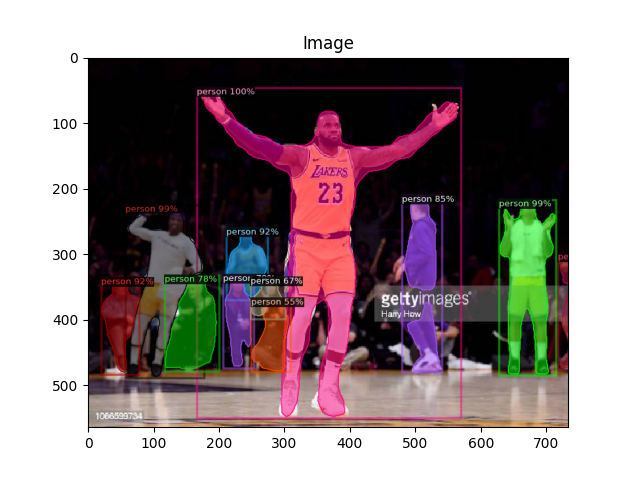

In [31]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("Misc/cascade_mask_rcnn_X_152_32x8d_FPN_IN5k_gn_dconv.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("Misc/cascade_mask_rcnn_X_152_32x8d_FPN_IN5k_gn_dconv.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

# cutting edge

<IPython.core.display.Javascript object>


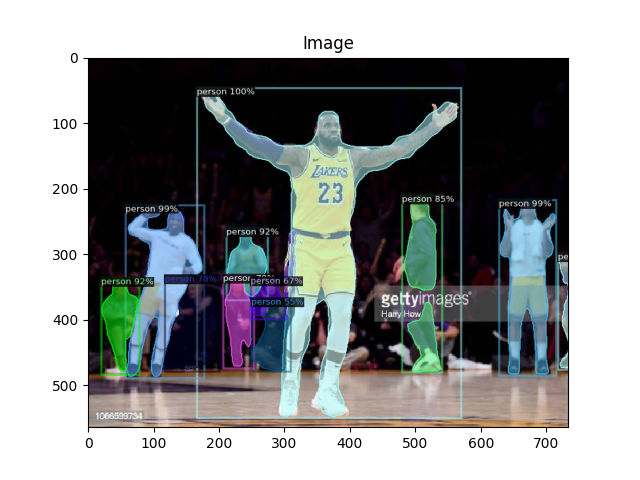

In [32]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("Misc/cascade_mask_rcnn_X_152_32x8d_FPN_IN5k_gn_dconv.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("Misc/cascade_mask_rcnn_X_152_32x8d_FPN_IN5k_gn_dconv.yaml")

predictor = DefaultPredictor(cfg)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

color = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.title('Image')
plt.show()

# crop

In [21]:
def cropper(org_image_path, mask_array, out_file_name,num_instance):
    #num_instances = mask_array.shape[0]
    mask_array = np.moveaxis(mask_array, 0, -1)
    mask_array_instance = []
    img = cv2.imread(str(org_image_path))
    #output = np.zeros_like(img)
    output=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #for i in range(num_instance):
    k=0
    for i in num_instance:
        mask_array_instance.append(mask_array[:, :, i:(i+1)])
        output = np.where(mask_array_instance[k] == False, 0, output)
        k+=1
    im = Image.fromarray(output)
    im.save(out_file_name)

<IPython.core.display.Javascript object>


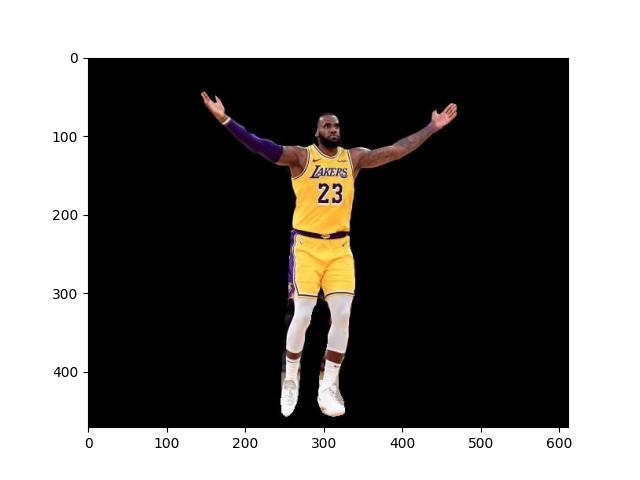

In [33]:
mask_array=outputs["instances"].to("cpu").pred_masks.numpy()

list_person=[]
k=-1
for i in outputs["instances"].to("cpu").pred_classes.numpy():
    k+=1
    if MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[i]=="person":
        list_person.append(k)

list_person=[0]
cropper("./image/input/input.jpg",mask_array,"./image/output/out.jpg",list_person)
im = cv2.imread("./image/output/out.jpg")
color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(color)
plt.show()

# dense crf

In [34]:
def densecrf(I, P, param):
    """
    input parameters:
        I    : a numpy array of shape [H, W, C], where C should be 3.
               type of I should be np.uint8, and the values are in [0, 255]
        P    : a probability map of shape [H, W, L], where L is the number of classes
               type of P should be np.float32
        param: a tuple giving parameters of CRF (w1, alpha, beta, w2, gamma, it), where
                w1    :   weight of bilateral term, e.g. 10.0
                alpha :   spatial distance std, e.g., 80
                beta  :   rgb value std, e.g., 15
                w2    :   weight of spatial term, e.g., 3.0
                gamma :   spatial distance std for spatial term, e.g., 3
                it    :   iteration number, e.g., 5
    output parameters:
        out  : a numpy array of shape [H, W], where pixel values represent class indices. 
    """
    out = denseCRF.densecrf(I, P, param) 
    return out

def convert_label_to_probability_map(label, color_list):
    [H, W, _] = label.shape
    C = len(color_list)
    prob  = np.zeros([H, W, len(color_list)], np.float32) 
    for h in range(H):
        for w in range(W):
            ca = label[h, w, :]
            if sum(ca) == 0:
                for c in range(C):
                    prob[h, w, c] = 1.0 / C
            else:
                for c in range(C):
                    cb = color_list[c]
                    if(ca[0]==cb[0] and ca[1]==cb[1] and ca[2]==cb[2]):
                        prob[h, w, c] = 1.0
                        break
    return prob 

def colorize_label_map(label, color_list):
    [H, W] = label.shape
    out = np.zeros((H, W, 3), np.uint8)
    for h in range(H):
        for w in range(W):
            idx = label[h, w] 
            color = np.asarray(color_list[idx])
            out[h, w, :] = color
    return out

<IPython.core.display.Javascript object>


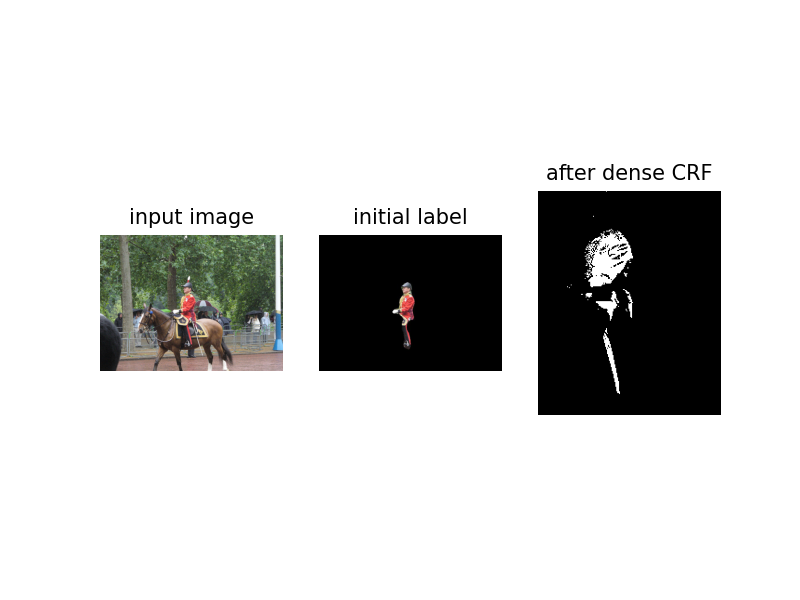

In [9]:
I  = Image.open('.image/input/input.jpg')
Iq = np.asarray(I)

# load initial labels, and convert it into an array 'prob' with shape [H, W, C]
# where C is the number of labels
# prob[h, w, c] means the probability of pixel at (h, w) belonging to class c.
L  = Image.open('.image/input/out.jpg')
Lq = np.asarray(L, np.float32) / 255
prob = Lq[:, :, :2]
prob[:, :, 0] = 1.0 - prob[:, :, 0]

w1    = 10.0  # weight of bilateral term
alpha = 80    # spatial std
beta  = 13    # rgb  std
w2    = 3.0   # weight of spatial term
gamma = 3     # spatial std
it    = 5.0   # iteration
param = (w1, alpha, beta, w2, gamma, it)
lab = densecrf(Iq, prob, param)
lab = Image.fromarray(lab*255)
plt.subplot(1,3,1); plt.axis('off'); plt.imshow(I); plt.title('input image')
plt.subplot(1,3,2); plt.axis('off'); plt.imshow(L); plt.title('initial label')
plt.subplot(1,3,3); plt.axis('off'); plt.imshow(lab); plt.title('after dense CRF')
plt.show()

<IPython.core.display.Javascript object>


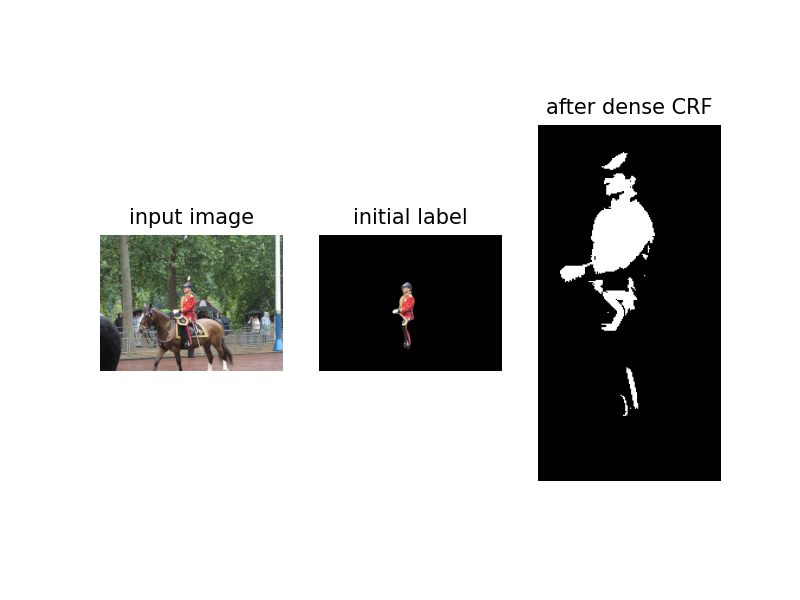

In [10]:
I  = Image.open('./input.jpg')
Iq = np.asarray(I)

# load initial labels, and convert it into an array 'prob' with shape [H, W, C]
# where C is the number of labels
# prob[h, w, c] means the probability of pixel at (h, w) belonging to class c.
L  = Image.open('./out.jpg')
Lq = np.asarray(L, np.float32) / 255
prob = Lq[:, :, :2]
prob[:, :, 0] = 1.0 - prob[:, :, 0]

w1    = 10.0  # weight of bilateral term
alpha = 15    # spatial std
beta  = 13    # rgb  std
w2    = 3.0   # weight of spatial term
gamma = 3     # spatial std
it    = 5.0   # iteration
param = (w1, alpha, beta, w2, gamma, it)
lab = densecrf(Iq, prob, param)
lab = Image.fromarray(lab*255)
plt.subplot(1,3,1); plt.axis('off'); plt.imshow(I); plt.title('input image')
plt.subplot(1,3,2); plt.axis('off'); plt.imshow(L); plt.title('initial label')
plt.subplot(1,3,3); plt.axis('off'); plt.imshow(lab); plt.title('after dense CRF')
plt.show()

<IPython.core.display.Javascript object>


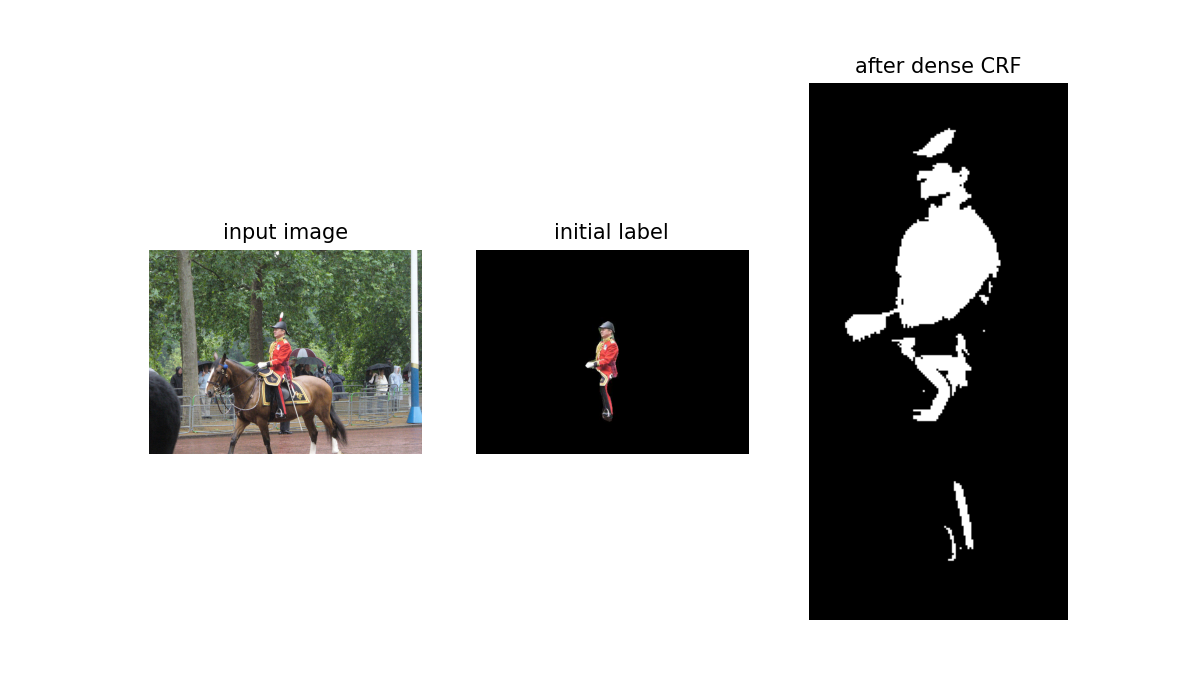

In [12]:
I  = Image.open('./input.jpg')
Iq = np.asarray(I)

# load initial labels, and convert it into an array 'prob' with shape [H, W, C]
# where C is the number of labels
# prob[h, w, c] means the probability of pixel at (h, w) belonging to class c.
L  = Image.open('./out.jpg')
Lq = np.asarray(L, np.float32) / 255
prob = Lq[:, :, :2]
prob[:, :, 0] = 1.0 - prob[:, :, 0]

w1    = 10.0  # weight of bilateral term
alpha = 15    # spatial std
beta  = 30    # rgb  std
w2    = 5.0   # weight of spatial term
gamma = 1     # spatial std
it    = 10.0   # iteration
param = (w1, alpha, beta, w2, gamma, it)
lab = densecrf(Iq, prob, param)
lab = Image.fromarray(lab*255)
plt.subplot(1,3,1); plt.axis('off'); plt.imshow(I); plt.title('input image')
plt.subplot(1,3,2); plt.axis('off'); plt.imshow(L); plt.title('initial label')
plt.subplot(1,3,3); plt.axis('off'); plt.imshow(lab); plt.title('after dense CRF')
plt.show()

In [33]:
lab.convert('RGB').save('dcrf.jpeg')